#### Nguyễn Tiến Dũng

KSTN - Toán Tin - K62

Đại học Bách khoa Hà Nội

20170062

##### Câu 1:

**a.** Không gian trạng thái $$\mathbb{I}_Y = \{-1, 1\}$$

Ta có 

##### Câu 2:

##### Câu 3:

**a.**

Đồ thị của xích Markov như sau:

![a](./assignment_img/2-3-a.eps)

Từ đó ta thấy

- Lớp liên thông: $\{1, 2\}, \{4\}$
- Xích Markov không tối giản do không có trạng thái nào đến được `2`

**b.** 

Đồ thị của xích Markov như sau:

![b](./assignment_img/2-3-b.eps)

Từ đó thấy: 

- Các lớp liên thông: $\{1\}, \{2\}, \{3,4\}$
- Không tối giản do `0` không liên thông với trạng thái nào

##### Câu 4:

*Ý tưởng*

Chương trình sử dụng `BFS` để tìm đường đi giữa 2 đỉnh trong một đồ thị, tức là nếu tồn tại đường đi trên đồ thị từ đỉnh `source` đến `target` thì trạng thái `source` $\rightarrow$ `target`

*Data structure*

Ta sử dụng `adjacency list` để biểu diễn đồ thị, do đó cần chuyển từ ma trận xác suất chuyển thành `adjacency list`.

Không cần quan tâm đến giá trị các ô trong ma trận, chỉ cần khác 0 là có đường đi

```python
def convert_to_adjacency(state, P):
    adjagecy_vector = {i:[] for i in state}
    for i in range(len(P)):
        for j in range(len(P)):
            if P[i][j] != 0:
                adjagecy_vector[state[i]].append(state[j])
    return adjagecy_vector
```

*Thuật toán*

Sử dụng `BFS`:

```python
def is_connected(state, P, source, target):
    vector = convert_to_adjacency(state, P)
    visit_status = {i: False for i in state}
    queue = []
    queue.append(source)
    while queue != []:
        current_state = queue[0]
        queue.pop(0)
        visit_status[current_state] = True
        for s in vector[current_state]:
            if visit_status[s] == False:
                queue.append(s)
        if target in queue:
            return True
    return False
```

In [68]:
import processviz as pvz

G = pvz.MarkovChain()
G.from_file()

Kiểm tra trạng thái `A` có đến được trạng thái `B` hay không 

```python
self.is_connected(source, target)
```

Ví dụ, đối với xích Markov `G`, để kiểm tra trạng thái `i` có thể đến được trạng thái `j` hay không, ta làm như sau:

```python
G.is_connected(i, j)
```

##### Câu 5:

Ma trận xác suất chuyển $T$ được gọi là ma trận xác suất chuyển chính quy (ergodic) nếu tồn tại $n$ sao cho $T^n$ có tất cả các phần tử đều khác 0. Xích Markov được biểu diễn bởi $T$ được gọi là xích Markov chính quy.

Xét xích `Markov` $(X_n)_{n\ge0}$ có ma trận xác suất chuyển $P$.

##### Các kiến thức bổ sung:

**Định nghĩa 1:** *Trạng thái $i$ được gọi là `recurrent` nếu $\sum_{n = 1}^{\infty}p_{ii}^{(n)} = \infty$*

**Định nghĩa 2:** *Trạng thái $i$ có `period` $d > 1$ nếu $d$ là số lớn nhất thỏa mãn $p_{ii}^{(n)} > 0$ với mọi $n: d|n$ và $p_{ii}^{(n)} = 0$ trong các trường hợp còn lại $\rightarrow$ `periodic`

**Định nghĩa 3:** *Trạng thái $i$ không có chu kì được gọi là `aperiodic`*

**Bổ đề:** *Giả sử $i$ là `aperiodic`, ta chứng minh tồn tại $n_i$ để $\forall n > n_i, p_{ii}^{(n)} > 0$.*

*Chứng minh*

Hiển nhiên dễ thấy $i$ là `recurrent`.

Xét $T = \{n|p_{ii}^{(n)}>0\}$. Do $i$ là `aperiodic` nên dễ thấy $d = GCD(n, n \in T) = 1$. Lấy $n_1, n_2 \in T$ sao cho $GCD(n_1, n_2) = 1$.

Khi đó, theo định lí [Sylvestor - Chicken McNugget theorem](https://artofproblemsolving.com/wiki/index.php/Chicken_McNugget_Theorem), ta có: 
\begin{equation}
\forall n > (n_1-1)(n_2-1) \\
\Rightarrow p_{ii}^{(n)} > 0
\end{equation}

Ta có điều cần chứng minh.

###### Chứng minh

Ta chứng minh nếu $(X_n)$ là `irreducible` và tồn tại một trạng thái là `aperiodic` thì xích $(X_n)$ chính quy.

Thật vậy, giả sử $i$ là `aperiodic`. Ta chứng minh $\forall j \in I$, $j$ là `aperiodic`.

Theo bổ đề trên, hiển nhiên tồn tại $n_1$ sao cho $p_{ii}^{n}>0, n>n_1$. Do $P$ là `irreducible` nên tồn tại $n_{ij}, n_{ji}$ sao cho $p_{ij}^{n_{ij}}>0, p_{ji}^{n_{ji}}>0$.

Có:
\begin{equation}
p_{jj}^{n_{ij} + n + n_{ji}} \ge p_{ij}^{n_{ij}}p_{ii}^{n}p_{ji}^{n_{ji}} > 0
\end{equation}

Lại có:
\begin{equation}
p_{jj}^{n_{ij} + n+1 + n_{ji}} \ge p_{ij}^{n_{ij}}p_{ii}^{n+1}p_{ji}^{n_{ji}} > 0
\end{equation}

Vậy chứng tỏ $j$ là `aperiodic`.

Tiếp theo ta chứng minh tồn tại $N$ để $p_{ij}^N>0$.

Đặt $q = \underset{n_i}{max}\{p_{ii}^{(n)}>0, n>n_i\}$. Khi đó, ta chứng minh tồn tại $t$ sao cho $p_{ij}^{(t)} > 0$.

Có:
\begin{equation}
\left\{\begin{matrix}
p_{ii}^{(t)} > 0\\ 
p_{ij}^{(t)} \ge p_{ij}^{n_{ij}}p_{jj}^{t - n_{ij}} > 0
\end{matrix}\right.
\end{equation}

Để điều trên xảy ra với mọi $i, j$, ta chọn $t = \underset{i, j}{max}\{n_{ij} + q\}$

Vậy ta có $(X_n)_{n \ge 0}$ là chính quy

In [69]:
for i in G.state:
    for j in G.state:
        print(i, '->', j, ': ', G.is_connected(i, j))

Rich -> Rich :  True
Rich -> Neutral :  True
Rich -> Poor :  True
Rich -> Loser :  True
Neutral -> Rich :  True
Neutral -> Neutral :  True
Neutral -> Poor :  True
Neutral -> Loser :  True
Poor -> Rich :  True
Poor -> Neutral :  True
Poor -> Poor :  True
Poor -> Loser :  True
Loser -> Rich :  True
Loser -> Neutral :  True
Loser -> Poor :  True
Loser -> Loser :  True


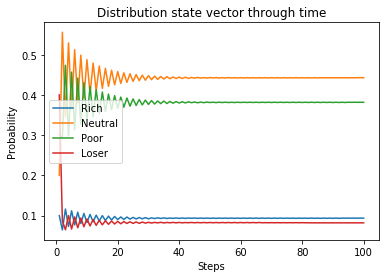

In [73]:
G.generate_state_graph(100)

array([[0.176, 0.092, 0.72 , 0.011],
       [0.018, 0.761, 0.074, 0.147],
       [0.157, 0.173, 0.642, 0.028],
       [0.109, 0.378, 0.443, 0.069]])

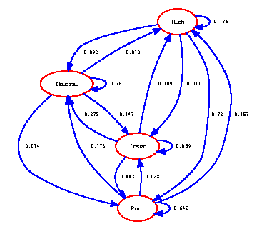

In [71]:
G.generate_graph(4)
G.data